# Final  SQL Project

by Sasha Fridman, May 2024

<hr style="border: none; border-top: 2px solid black;">

## 📖 Project Description <a name="project-description"></a>

During the COVID-19 pandemic, there has been a rise in online platforms for book enthusiasts. **We have a database with data on books, publishers, authors, and customer ratings. Our goal is to analyze this data to create a compelling value proposition for a new product** in this competitive market.

**The tasks are following**:
1. Find the number of books released after January 1, 2000.
1. Find the number of user reviews and the average rating for each book.
1. Identify the publisher that has released the greatest number of books with more than 50 pages (this will help to exclude brochures and  similar publications from the analysis).
1. Identify the author with the highest average book rating: looking only at books with at least 50 ratings.
1. Find the average number of text reviews among users who rated more than 50 books.

## 📚 Loading Data and Libraries <a name="loading-data-and-libraries"></a>

In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine
import sidetable


db_config = {'user': 'praktikum_student',         # user name
             'pwd': 'Sdf4$2;d-d30pp', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the data base

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})


# printing more than 1 output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# making possible to display all columns/rows in output
#pd.set_option ('display.max_columns', None)

# displaying Markdown-formatted text in code output cells
from IPython.display import Markdown, display


## 🔍 Data Exploration  <a name="data-exploration"></a>

### Description of the Data

**`books`** - contains data on books:
- `book_id`
- `author_id`
- `title`
- `num_pages` — number of pages
- `publication_date`
- `publisher_id`
  
<br>

**`authors`** - contains data on authors:
- `author_id`
- `author`
  
<br>

**`publishers`** - contains data on publishers:
- `publisher_id`
- `publisher`
  
<br>

**`ratings`** - contains data on user ratings:
- `rating_id`
- `book_id`
- `username` — the name of the user who rated the book
- `rating`
  
<br>

**`reviews`** - contains data on customer reviews:
- `review_id`
- `book_id`
- `username` — the name of the user who reviewed the book   
- `text` — the text of the review

### Data Diagram

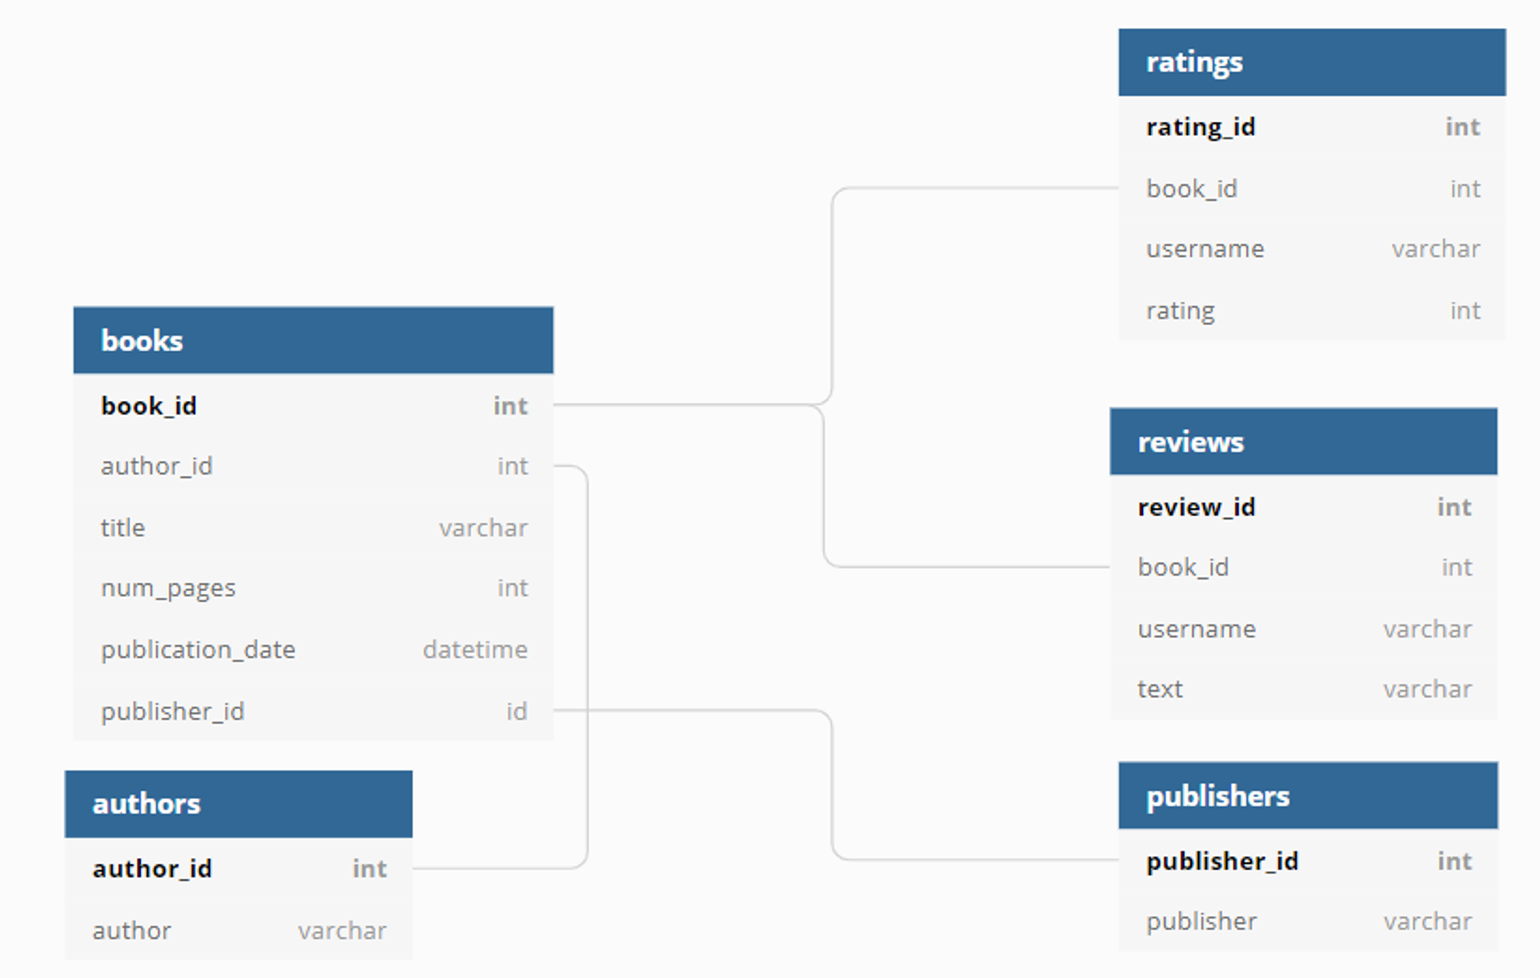


### 👁️ Initial Data Overview <a name="initial-data-overview"></a>

Since we have several interconnected dataframes it looks reasonable to create a unified approach for checking them. For each dataframe we will study its' concise summary, overview - top rows, descriptive statistics, missing values and duplicates if any. Then we will address our findings.

In [3]:
def data_inspection_sql(table_name):
    query = f"SELECT * FROM {table_name}"
    df = pd.io.sql.read_sql(query, con=engine)
    
    display(Markdown(f'**Concise summary on `{table_name}`**:'))
    print(df.info(),'\n')
    display(Markdown(f'**Top rows of `{table_name}`**:')) 
    print(df.head(5),'\n')  
    display(Markdown(f'**Descriptive statistics of `{table_name}`**:')) 
    print(df.describe(),'\n')  # Print descriptive statistics
    display(Markdown(f'**Descriptive statistics for categorical parameters of `{table_name}`**:'))
    print(df.describe(include=['object']),'\n')  # Print descriptive statistics for categorical parameters
    display(Markdown(f'**Missing values in `{table_name}`**:')) 
    display(df.stb.missing(style=True))  # Display missing values
    print()
    display(Markdown(f'**Number of duplicates in `{table_name}`**:'))
    print(df.duplicated().sum(),'\n') 
    display(Markdown(f'**Share of duplicates in `{table_name}`**: {round(df.duplicated().mean()*100, 2)}%'))
    print(df[df.duplicated()].head(10), '\n', '='*100)


#### `books`

In [4]:
data_inspection_sql('books')

**Concise summary on `books`**:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None 



**Top rows of `books`**:

   book_id  author_id                                              title  \
0        1        546                                       'Salem's Lot   
1        2        465                 1 000 Places to See Before You Die   
2        3        407  13 Little Blue Envelopes (Little Blue Envelope...   
3        4         82  1491: New Revelations of the Americas Before C...   
4        5        125                                               1776   

   num_pages publication_date  publisher_id  
0        594       2005-11-01            93  
1        992       2003-05-22           336  
2        322       2010-12-21           135  
3        541       2006-10-10           309  
4        386       2006-07-04           268   



**Descriptive statistics of `books`**:

           book_id    author_id   num_pages  publisher_id
count  1000.000000  1000.000000  1000.00000   1000.000000
mean    500.500000   320.417000   389.11100    171.270000
std     288.819436   181.620172   229.39014     99.082685
min       1.000000     1.000000    14.00000      1.000000
25%     250.750000   162.750000   249.00000     83.000000
50%     500.500000   316.500000   352.00000    177.500000
75%     750.250000   481.000000   453.00000    258.000000
max    1000.000000   636.000000  2690.00000    340.000000 



**Descriptive statistics for categorical parameters of `books`**:

                      title publication_date
count                  1000             1000
unique                  999              618
top     Memoirs of a Geisha       2006-08-29
freq                      2               10 



**Missing values in `books`**:

,missing,total,percent
book_id,0,"1,000",0.00%
author_id,0,"1,000",0.00%
title,0,"1,000",0.00%
num_pages,0,"1,000",0.00%
publication_date,0,"1,000",0.00%
publisher_id,0,"1,000",0.00%


**Number of duplicates in `books`**:

0 



**Share of duplicates in `books`**: 0.0%

Empty DataFrame
Columns: [book_id, author_id, title, num_pages, publication_date, publisher_id]
Index: [] 


In [5]:
# checking unique book titles
query = f"SELECT * FROM books"
df_books = pd.io.sql.read_sql(query, con=engine)
df_books.title.value_counts()[:3]

title
Memoirs of a Geisha       2
'Salem's Lot              1
The Catcher in the Rye    1
Name: count, dtype: int64

In [6]:
df_books[df_books['title'] == 'Memoirs of a Geisha']

,book_id,author_id,title,num_pages,publication_date,publisher_id
425,426,39,Memoirs of a Geisha,434,2005-11-15,241
426,427,39,Memoirs of a Geisha,503,2005-11-22,311


##### Observations
- All data types are fine.
- No missing values or duplicates revealed.
- **There are 1000 books in total, of which 999 are unique.** A book titled "Memoirs of a Geisha" was published almost simultaneously by two different publishers. 

#### `authors`

In [7]:
data_inspection_sql('authors')

**Concise summary on `authors`**:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
None 



**Top rows of `authors`**:

   author_id                          author
0          1                      A.S. Byatt
1          2  Aesop/Laura Harris/Laura Gibbs
2          3                 Agatha Christie
3          4                   Alan Brennert
4          5        Alan Moore/David   Lloyd 



**Descriptive statistics of `authors`**:

        author_id
count  636.000000
mean   318.500000
std    183.741666
min      1.000000
25%    159.750000
50%    318.500000
75%    477.250000
max    636.000000 



**Descriptive statistics for categorical parameters of `authors`**:

            author
count          636
unique         636
top     A.S. Byatt
freq             1 



**Missing values in `authors`**:

,missing,total,percent
author_id,0,636,0.00%
author,0,636,0.00%


**Number of duplicates in `authors`**:

0 



**Share of duplicates in `authors`**: 0.0%

Empty DataFrame
Columns: [author_id, author]
Index: [] 


In [8]:
pd.io.sql.read_sql('''
    SELECT * 
    FROM authors
    WHERE author LIKE '%%Stephen King%%';
''', con=engine)

,author_id,author
0,438,Neil Gaiman/Mike Allred/Gary Amaro/Mark Buckin...
1,490,Richard Bachman/Stephen King
2,542,Stephen King
3,543,Stephen King/Bernie Wrightson
4,544,Stephen King/Bernie Wrightson/Michele Wrightson
5,545,Stephen King/Bettina Blanch Tyroller
6,546,Stephen King/Jerry N. Uelsmann
7,547,Stephen King/Marie Milpois
8,548,Stephen King/Ned Dameron
9,549,Stephen King/Peter Straub


##### Observations
- All data types are fine.
- No missing values or duplicates revealed.
- There are 636 unique sets of authors in total. This indicates that a book can be authored by one or multiple individuals. For instance, some books are written by Stephen King alone, while others are co-authored by him with other writers.

#### `publishers`

In [9]:
data_inspection_sql('publishers')

**Concise summary on `publishers`**:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
None 



**Top rows of `publishers`**:

   publisher_id                          publisher
0             1                                Ace
1             2                           Ace Book
2             3                          Ace Books
3             4                      Ace Hardcover
4             5  Addison Wesley Publishing Company 



**Descriptive statistics of `publishers`**:

       publisher_id
count    340.000000
mean     170.500000
std       98.293777
min        1.000000
25%       85.750000
50%      170.500000
75%      255.250000
max      340.000000 



**Descriptive statistics for categorical parameters of `publishers`**:

       publisher
count        340
unique       340
top          Ace
freq           1 



**Missing values in `publishers`**:

,missing,total,percent
publisher_id,0,340,0.00%
publisher,0,340,0.00%


**Number of duplicates in `publishers`**:

0 



**Share of duplicates in `publishers`**: 0.0%

Empty DataFrame
Columns: [publisher_id, publisher]
Index: [] 


##### Observations
- All data types are fine.
- No missing values or duplicates revealed.
- There are 340 publishers in total.

#### `ratings`

In [10]:
data_inspection_sql('ratings')

**Concise summary on `ratings`**:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
None 



**Top rows of `ratings`**:

   rating_id  book_id       username  rating
0          1        1     ryanfranco       4
1          2        1  grantpatricia       2
2          3        1   brandtandrea       5
3          4        2       lorichen       3
4          5        2    mariokeller       2 



**Descriptive statistics of `ratings`**:

         rating_id      book_id       rating
count  6456.000000  6456.000000  6456.000000
mean   3228.500000   510.574195     3.928284
std    1863.831001   284.141636     0.943303
min       1.000000     1.000000     1.000000
25%    1614.750000   291.000000     3.000000
50%    3228.500000   506.000000     4.000000
75%    4842.250000   750.000000     5.000000
max    6456.000000  1000.000000     5.000000 



**Descriptive statistics for categorical parameters of `ratings`**:

          username
count         6456
unique         160
top     martinadam
freq            56 



**Missing values in `ratings`**:

,missing,total,percent
rating_id,0,"6,456",0.00%
book_id,0,"6,456",0.00%
username,0,"6,456",0.00%
rating,0,"6,456",0.00%


**Number of duplicates in `ratings`**:

0 



**Share of duplicates in `ratings`**: 0.0%

Empty DataFrame
Columns: [rating_id, book_id, username, rating]
Index: [] 


In [11]:
# checking details in "ratings" database
query = f"SELECT * FROM ratings"
df_ratings = pd.io.sql.read_sql(query, con=engine)

print('Average number of ratings by user: ', round(df_ratings.username.value_counts().mean(), 1))
print()
print('Users with the most ratings: ')
df_ratings.username.value_counts()
print()
print('Numer of unique books IDs: ', df_ratings.book_id.nunique())

Average number of ratings by user:  40.4

Users with the most ratings: 


username
martinadam        56
paul88            56
richard89         55
sfitzgerald       55
jennifermiller    53
                  ..
conradanita       30
wsingleton        30
lunakathryn       30
fconrad           29
robert00          29
Name: count, Length: 160, dtype: int64


Numer of unique books IDs:  1000


##### Observations
- All data types are fine.
- No missing values or duplicates revealed.
- There are 6456 ratings in total left by 160 unique users.
- Users on average rated 40 books, where the most active users left up to 56 ratings.
- Number of unique books IDs in `ratings` is 1000, and thus corresponds to that in `books`.

#### `reviews`

In [12]:
data_inspection_sql('reviews')

**Concise summary on `reviews`**:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
None 



**Top rows of `reviews`**:

   review_id  book_id       username  \
0          1        1   brandtandrea   
1          2        1     ryanfranco   
2          3        2       lorichen   
3          4        3  johnsonamanda   
4          5        3    scotttamara   

                                                text  
0  Mention society tell send professor analysis. ...  
1  Foot glass pretty audience hit themselves. Amo...  
2  Listen treat keep worry. Miss husband tax but ...  
3  Finally month interesting blue could nature cu...  
4  Nation purpose heavy give wait song will. List...   



**Descriptive statistics of `reviews`**:

         review_id      book_id
count  2793.000000  2793.000000
mean   1397.000000   504.693161
std     806.413976   288.472931
min       1.000000     1.000000
25%     699.000000   259.000000
50%    1397.000000   505.000000
75%    2095.000000   753.000000
max    2793.000000  1000.000000 



**Descriptive statistics for categorical parameters of `reviews`**:

       username                                               text
count      2793                                               2793
unique      160                                               2793
top     susan85  Mention society tell send professor analysis. ...
freq         29                                                  1 



**Missing values in `reviews`**:

,missing,total,percent
review_id,0,"2,793",0.00%
book_id,0,"2,793",0.00%
username,0,"2,793",0.00%
text,0,"2,793",0.00%


**Number of duplicates in `reviews`**:

0 



**Share of duplicates in `reviews`**: 0.0%

Empty DataFrame
Columns: [review_id, book_id, username, text]
Index: [] 


In [13]:
# checking details in "reviews" database
query = f"SELECT * FROM reviews"
df_reviews = pd.io.sql.read_sql(query, con=engine)

print('Average number of reviews by user: ', round(df_reviews.username.value_counts().mean(), 1))
print()
print('Users with the most reviews: ')
df_reviews.username.value_counts()
print()
print('Numer of unique book IDs: ', df_reviews.book_id.nunique())

Average number of reviews by user:  17.5

Users with the most reviews: 


username
susan85           29
sfitzgerald       28
martinadam        27
eallen            26
lesliegibbs       26
                  ..
joseph14          10
dwayne09          10
todd65            10
robert00           9
millernicholas     5
Name: count, Length: 160, dtype: int64


Numer of unique book IDs:  994


##### Observations
- All data types are fine.
- No missing values or duplicates revealed.
- There are 2793 reviews in total left by 160 unique users. 
- Users on average reviews 17.5 books, where the most active users wrote up to 29 reviews.
- Number of unique books IDs in `reviews` is 1000, and thus corresponds to that in `books`.

####  General Observations
- All the databases represent **valid types of data and absence of both missing values and duplicates**.
- We deal with **data on 1000 book IDs**, where only one book title is not unique (as this book was issued by two different publishers).
- There are a total of **636 unique sets of authors**, where books are authored by one or multiple individuals.
- There are **6456 ratings and 2793 reviews from 160 unique users**.
- An extra **examination of data integrity reveals positive results**, such as the same number of unique book IDs across all databases.
- **Overall, users were quite engaged and left 40 ratings and 17.5 reviews on average**. At first glance, the users leading in the number of ratings, also wrote the most of reviews. However, we won't investigate these insights further, since they are not central to the Project. 

## 🗝️ Addressing the Project's Questions <a name="addressing-questionss"></a>

Let's write a function for displaying SQL outputs more conveniently.

In [14]:
def sql_output(query):    
    return pd.io.sql.read_sql(query, con=engine)

In [15]:
# checking the function
query = "SELECT * FROM books LIMIT 3"
sql_output(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135


### Task 1: Find the number of books released after January 1, 2000.

In [16]:
query = '''
    SELECT 
        COUNT(book_id) AS number_of_books
    FROM 
        books
    WHERE 
        publication_date > '2000-01-01';
'''

sql_output(query)

,number_of_books
0,819


There were 819 books released after January 1, 2000, which represents slightly over 80% of the total number (819 out of 1000).

### Task 2: Find the number of user reviews and the average rating for each book.

In [17]:
query = '''
    SELECT
        b.book_id,
        b.title,
        COUNT(rev.review_id) AS reviews_number, 
        ROUND(AVG(rat.rating), 1) AS average_rating
    FROM 
        books AS b LEFT JOIN reviews AS rev ON b.book_id = rev.book_id
        LEFT JOIN ratings AS rat ON b.book_id = rat.book_id
    GROUP BY b.book_id
    ORDER BY reviews_number DESC
'''

sql_output(query)

,book_id,title,reviews_number,average_rating
0,948,Twilight (Twilight #1),1120,3.7
1,750,The Hobbit or There and Back Again,528,4.1
2,673,The Catcher in the Rye,516,3.8
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,492,4.4
4,299,Harry Potter and the Chamber of Secrets (Harry...,480,4.3
...,...,...,...,...
995,221,Essential Tales and Poems,0,4.0
996,808,The Natural Way to Draw,0,3.0
997,191,Disney's Beauty and the Beast (A Little Golden...,0,4.0
998,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.7


In [18]:
# checking books without reviews

query = '''
    SELECT
        b.book_id,
        b.title,
        COUNT(rev.review_id) AS reviews_number, 
        ROUND(AVG(rat.rating), 1) AS average_rating
    FROM 
        books AS b LEFT JOIN reviews AS rev ON b.book_id = rev.book_id
        LEFT JOIN ratings AS rat ON b.book_id = rat.book_id        
    GROUP BY b.book_id
    HAVING COUNT(rev.review_id) = 0
    ORDER BY reviews_number DESC
'''

sql_output(query)

,book_id,title,reviews_number,average_rating
0,387,Leonardo's Notebooks,0,4.0
1,191,Disney's Beauty and the Beast (A Little Golden...,0,4.0
2,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.0
3,808,The Natural Way to Draw,0,3.0
4,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.7
5,221,Essential Tales and Poems,0,4.0


In [19]:
# checking books with average rating of 5

query = '''
    SELECT 
        COUNT(*) AS count_of_books_with_rating_5
    FROM    
        (SELECT
            b.book_id,
            b.title,
            COUNT(rev.review_id) AS reviews_number, 
            ROUND(AVG(rat.rating), 1) AS average_rating
        FROM 
            books AS b LEFT JOIN reviews AS rev ON b.book_id = rev.book_id
            LEFT JOIN ratings AS rat ON b.book_id = rat.book_id       
        GROUP BY b.book_id
        HAVING ROUND(AVG(rat.rating), 1) = 5
        ) AS subquery;        
'''

sql_output(query)

,count_of_books_with_rating_5
0,44


- Among the books analyzed, "Twilight (Twilight #1)", "The Hobbit or There and Back Again", and "The Catcher in the Rye" received the highest number of reviews. "Twilight (Twilight #1)" stands out with an impressive 1120 reviews, despite its modest rating of 3.7
- There are 6 books without reviews and 44 books with a maximum average rating of 5 stars.

### Task 3. Identify the publisher that has released the greatest number of books with more than 50 pages.

In [20]:
query = '''
    SELECT
        p.publisher_id,
        p.publisher,
        COUNT(b.book_id) as books_number
    FROM 
        books AS b LEFT JOIN publishers AS p
        ON b.publisher_id = p.publisher_id
    WHERE 
        num_pages > 50
    GROUP BY 
        p.publisher_id
    ORDER BY 
        COUNT(b.book_id) DESC
    LIMIT 1;    
'''
sql_output(query)

,publisher_id,publisher,books_number
0,212,Penguin Books,42


The Penguin Books publisher published 42 books with more than 50 pages, thus becoming the leading publisher.

### Task 4: Identify the author with the highest average book rating: looking only at books with at least 50 ratings.

In [21]:
query = '''
    WITH most_rated_books AS 
        (SELECT 
            book_id, 
            round(COUNT(rating), 1) AS ratings_number
        FROM 
            ratings
        GROUP BY 
            book_id
        HAVING 
            COUNT(rating_id) > 50)
            
    SELECT         
        a.author_id, 
        a.author, 
        ROUND(AVG(rat.rating) ,1) AS average_rating
    FROM 
        books AS b LEFT JOIN authors AS a 
        ON b.author_id = a.author_id 
        LEFT JOIN ratings AS rat
        ON b.book_id = rat.book_id
    WHERE 
        b.book_id IN (SELECT book_id FROM most_rated_books)
    GROUP BY         
        a.author_id
    ORDER BY 
        average_rating DESC
    LIMIT 1;    
    '''
sql_output(query)

,author_id,author,average_rating
0,236,J.K. Rowling/Mary GrandPré,4.3


With an average rating score of 4.3 out of 5, "J.K. Rowling/Mary GrandPré" leads the average book rating. Where books with over 50 ratings were taken into account.

### Task 5: Find the average number of text reviews among users who rated more than 50 books.

In [22]:
query = '''         
    SELECT 
        ROUND(AVG(user_feedback.reviews_number), 1) AS avg_reviews
    FROM (
        SELECT 
            rev.username,
            COUNT(DISTINCT rat.rating_id) AS rating_number,
            COUNT(DISTINCT rev.review_id) AS reviews_number
        FROM 
            ratings AS rat LEFT JOIN reviews AS rev 
            ON rat.username = rev.username
        GROUP BY          
            rev.username    
        HAVING 
            COUNT(DISTINCT rat.book_id) > 50     
        ) AS user_feedback;    
    '''
sql_output(query)

,avg_reviews
0,24.3


There are an average of 24.3 text reviews among users who have rated more than 50 books.

## 📝 Summary <a name="summary"></a>

### Data Overview
- Databases contain valid, duplicate-free data.
- Databases include:
    - **1000 unique book IDs**, with one non-unique book title.
    - **636 unique author sets**, with books by one or multiple authors.
    - **6456 ratings and 2793 reviews from 160 users**.

### Project's Questions
1. There were **819 books released after January 1, 2000**, which represents slightly over 80% of the total number (819 out of 1000).
1. Among the books analyzed, "Twilight (Twilight #1)", "The Hobbit or There and Back Again", and "The Catcher in the Rye" received the highest number of reviews. **"Twilight (Twilight #1)" stands out with an impressive 1120 reviews, despite its modest rating of 3.7**. For the full list of books, along with their ratings and review totals, please refer to the study above.
1.  **The Penguin Books publisher is the leading publisher**, who published 42 books with more than 50 pages.**
1.  With an average rating score of 4.3 out of 5, **J.K. Rowling/Mary GrandPré leads the average book rating.** Where books with over 50 ratings were taken into account.
1. There are an average of **24.3 text reviews among users who have rated more than 50 books**.

### Ideas and Suggestions
Lets recollect, our goal was to analyze the data in the databases to develop a compelling value proposition for an online reading platform.

**The insights gained from the study can be invaluable for content creation and potentially for development of a recommendation system**, especially the list of books with ratings and reviews.


Additionally, further investigation into user preferences, on a larger scale, would be beneficial, as the study sample of 160 users may not be representative.

Based on the insights from the project questions, here are **some additional ideas that could be beneficial for a new product**:

- **Explore trends in books released  after 2000**: analyze recent publishing trends to identify shifts in genres or themes, requiring more data sources for accurate conclusions. Such analysis can improve content relevance and monetization strategies.

- **Explore collaboration with leading publishers and authors**: consider partnerships with leading publishers like Penguin Books and popular authors like J.K. Rowling and Mary GrandPré to offer special promotions and access to new releases.

- **Investigate users engagement**: analyze characteristics of highly engaged users to encourage greater engagement of others and aim to improve reviews quality. As increasing engagement has the potential to enhance platform profitability.